<a href="https://colab.research.google.com/github/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/geetanjalisawant16-patch-1/Copy_of_AutoML_and_Clustering_for_Market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AutoML and Clustering Experiments on Pre and Post Pandemic Big Data for 
#Market Segmentation
MSc. DATA SCIENCE

Module: Project Dissertation 

Student ID: K1144343

AutoML-and-Clustering-for-Market-segmentation Coding

####################################################################################################

This Jupyter Notebook consists of the assignment of "Market Segmentation Practical Project" for the MSc. Data Science CI7000 Project Dissertation Module at the Kingston University. The methods and steps of coding are reference from the case studies discussed during the lecture presented by the Module Leader.

####################################################################################################

# Importing the dataset

##**Method 1**: From Github (official Pandas github link)


First, we will import the online reatail and market cap datasets directly from the official pandas github [link1](https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/Online%20Retail.xlsx)
[link2](https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/companies_market_cap.csv)

In [ ]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

In [ ]:
!curl -O https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/Online%20Retail.xlsx
!curl -O https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/companies_market_cap.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  183k    0  183k    0     0  1382k      0 --:--:-- --:--:-- --:--:-- 1382k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  183k    0  183k    0     0  1641k      0 --:--:-- --:--:-- --:--:-- 1641k


In [ ]:
retail = pd.read_excel('/content/Online Retail.xlsx')


In [43]:
post_covid = pd.read_csv('companies_market_cap.csv')

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
retail.tail(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [44]:
post_covid

,S.No,Company,Country,Sector,Market cap ($bn),Market cap added,Change
0,1,Amazon,US,Consumer discretionary,"1,317.30",401.1,43.8
1,2,Microsoft,US,Technology,"1,473.00",269.9,22.4
2,3,Apple,US,Technology,"1,523.90",219.1,16.8
3,4,Tesla,US,Consumer discretionary,183.8,108.4,143.8
4,5,Tencent,China,Communication services,550.9,93.1,20.3
...,...,...,...,...,...,...,...
95,96,Snap,US,Communication services,31.5,8.7,38.0
96,97,Changchun High & New Technology Industry,China,Healthcare,21.5,8.5,65.2
97,98,Chewy,US,Consumer discretionary,19.9,8.3,72.2
98,99,GSX Techedu,China,Consumer discretionary,13.4,8.2,160.1


In [45]:
market = pd.merge(retail,post_covid)
market

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


# Initial Data Analysis:

> 1) Quality of data:

*    Frequency counts:
     The given dataset of covid-19 has got Structured and Unstructured data.
     It has got numeric(integer,float),Boolean(0,1) and strings i.e sequence
     of symbols kind of values in the data columns.
*    Discriptive/ Summary statistics.
      (mean,median,standard deviation, max,min,etc.)

*    Normality(frequency histograms)
  
> 2) Quality of Measurements,if applicable

> 3) Data Transformation: data transpose,data type change,sorting,deletion,etc.


## 1) Quality of data:


In [46]:
# a) checking the Datatypes frequency: 
market.info() # Gives the information about Index, Datatype and Memory information.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48624 entries, 0 to 48623
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InvoiceNo         48624 non-null  object        
 1   StockCode         48624 non-null  object        
 2   Description       48624 non-null  object        
 3   Quantity          48624 non-null  int64         
 4   InvoiceDate       48624 non-null  datetime64[ns]
 5   UnitPrice         48624 non-null  float64       
 6   CustomerID        47829 non-null  float64       
 7   Country           48624 non-null  object        
 8   S.No              48624 non-null  int64         
 9   Company           48624 non-null  object        
 10  Sector            48624 non-null  object        
 11  Market cap ($bn)  48624 non-null  object        
 12  Market cap added  48624 non-null  float64       
 13  Change            48624 non-null  float64       
dtypes: datetime64[ns](1), 

In [47]:
market.count() # returns the value of non-null values in each Dataframe(market)

InvoiceNo           48624
StockCode           48624
Description         48624
Quantity            48624
InvoiceDate         48624
UnitPrice           48624
CustomerID          47829
Country             48624
S.No                48624
Company             48624
Sector              48624
Market cap ($bn)    48624
Market cap added    48624
Change              48624
dtype: int64

In [48]:
# b) Descriptive/ Summary Statistics(mean,meadian,standard deviation,max,min,etc)
market.describe() # gives Summary staistics for numerical columns

,Quantity,UnitPrice,CustomerID,S.No,Market cap added,Change
count,48624.000000,48624.000000,47829.000000,48624.000000,48624.000000,48624.000000
mean,33.963619,4.653855,13161.048297,56.485830,18.868104,43.640058
std,73.552953,64.830839,995.588752,30.563052,11.334199,45.999461
min,-624.000000,0.000000,12357.000000,14.000000,8.800000,4.500000
25%,6.000000,1.050000,12532.000000,25.000000,9.000000,6.500000
50%,12.000000,1.650000,12681.000000,62.000000,11.600000,20.400000
75%,25.000000,3.350000,13813.000000,92.000000,27.300000,98.400000
max,2400.000000,4161.060000,17844.000000,95.000000,51.500000,171.100000


Text(0.5, 1.0, 'Frequency Histogram')

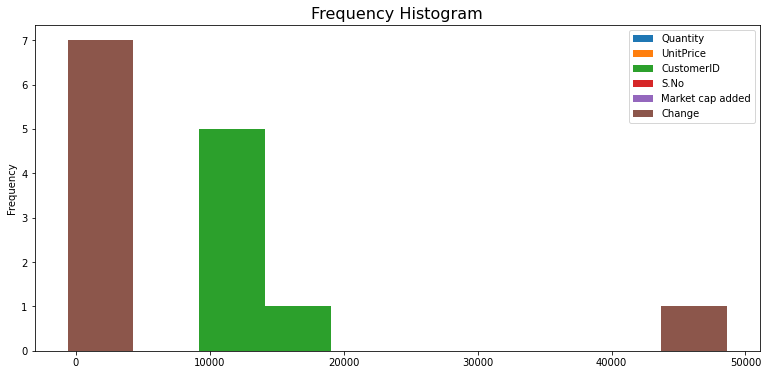

In [49]:
# c) Normality(frequency histograms)
market.describe().plot.hist(bins=10,figsize=[13,6])
plt.title('Frequency Histogram',fontsize=16)

In [50]:
market.equals(market)

True

In [51]:
market.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            48614, 48615, 48616, 48617, 48618, 48619, 48620, 48621, 48622,
            48623],
           dtype='int64', length=48624)

In [52]:
market.shape

(48624, 14)

In [53]:
market.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48620,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48621,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48622,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Data Cleaning


In [54]:
# find duplicates
market[market.duplicated()] 
# the o/p shows there are duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
3568,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,2011-03-21 12:42:00,1.65,12637.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3569,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,2011-03-21 12:42:00,1.65,12637.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
3614,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2011-03-21 12:42:00,2.95,12637.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3615,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2011-03-21 12:42:00,2.95,12637.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
5100,552826,82583,HOT BATHS METAL SIGN,4,2011-05-11 13:20:00,2.10,14277.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47484,564539,22378,WALL TIDY RETROSPOT,5,2011-08-25 15:22:00,2.10,12715.0,Sweden,77,Spotify,Communication services,37.2,10.4,38.8
47707,541975,22452,MEASURING TAPE BABUSHKA PINK,24,2011-01-24 14:24:00,2.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3
47708,541975,22454,MEASURING TAPE BABUSHKA RED,24,2011-01-24 14:24:00,2.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3
47709,541975,20749,ASSORTED COLOUR MINI CASES,6,2011-01-24 14:24:00,7.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3


In [56]:
market.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


In [55]:
# count the number of null values of all columns
market.isnull().sum()
# o/p
# customerID values can be removed


InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID          795
Country               0
S.No                  0
Company               0
Sector                0
Market cap ($bn)      0
Market cap added      0
Change                0
dtype: int64

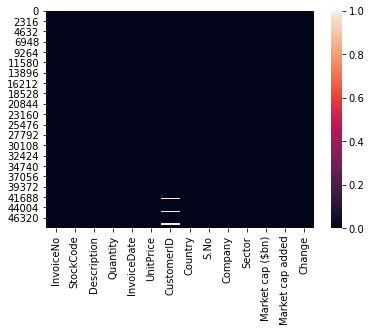

In [57]:
import seaborn as sns
sns .heatmap(market.isnull()) # we can show missing values graphically presented

In [58]:
# Droping rows having missing values

market = market.dropna()
market.shape

(47829, 14)

In [59]:
# count the number of null values of all columns
market.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
S.No                0
Company             0
Sector              0
Market cap ($bn)    0
Market cap added    0
Change              0
dtype: int64

In [60]:
# Changing the datatype of CustomerID as per Bussiness understanding
market['CustomerID'] = market['CustomerID'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Data Preparation

## We are going to analysis the Customers based on below 3 factors:
* R (Recency): Number of days since last purchase
* F (Frequency): Number of transactions
* M (Monetary): Total amount of transactions (revenue contributed)








In [ ]:
# New Attribute : Monetary

market['Amount'] = market['Quantity']*market['UnitPrice']
rfm_m = market.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

In [ ]:
# New Attribute : Frequency

rfm_f = market.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

In [ ]:
# Merging the two dfs rfm_m, rfm_f

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype

market['InvoiceDate'] = pd.to_datetime(market['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
# Compute the maximum date to know the last transaction date

max_date = max(market['InvoiceDate'])
max_date

In [ ]:
# Compute the difference between max date and transaction date

market['Diff'] = max_date - market['InvoiceDate']
market.head()

In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = market.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

##The removal of outliers from the dataset by two methods:


1. Statistical
2. Domain Specific



Text(0.5, 0, 'Attributes')

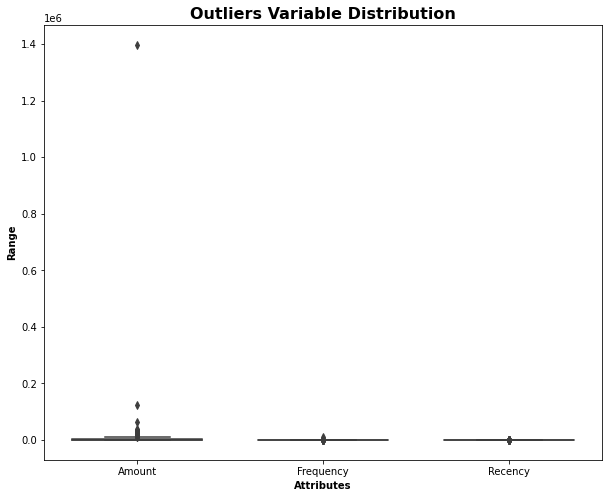

In [70]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v" ,whis=1.8,saturation=1.9, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [71]:
# Removing (statistical) outliers for Amount  # reference :https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [72]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12357.0,18623.01,393,32
1,12367.0,168.90,11,3
2,12371.0,5663.88,189,44
3,12372.0,1298.04,52,71
4,12377.0,4884.36,231,314
...,...,...,...,...
245,16321.0,230.70,16,71
246,17404.0,30300.82,201,3
247,17443.0,1602.72,3,219
248,17444.0,8820.12,405,147


##Rescaling the attributes
It is very important to rescale the variables to have comparable scale.There rae two ways of rescaling such as:


1.   Min-max scalng
2.  standardisation (mean=0, sigma=1)



In [73]:
from sklearn.preprocessing import StandardScaler, normalize
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(246, 3)

In [74]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,2.581460,1.428642,-0.548664
1,-0.612947,-0.735532,-0.835395
2,0.338234,0.272905,-0.430016
3,-0.417493,-0.503251,-0.163060
4,0.203300,0.510851,2.239550


In [80]:
!pip install plotly==4.5.2

In [76]:
!pip install dash

     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 1.0MB 40.9MB/s 
     |████████████████████████████████| 3.5MB 45.6MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 1.8MB 44.3MB/s 
     |████████████████████████████████| 358kB 39.8MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85845 sha256=7428064e4ed62842a057575273a8cae73ce6499668636a6601996690ce7f560c
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014873 sha256=074dfc61531ac6011a5d4054bde23bca790f399ba8e0a7990dad8aede67ecdcb
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540992 sha256=ceeb1dac4552fa013d247

In [83]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [84]:
market

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change,Amount,Diff
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.00,373 days 04:05:00
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.00,373 days 04:05:00
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.00,373 days 04:05:00
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.00,373 days 04:05:00
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,45.00,373 days 04:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7,10.00,106 days 01:23:00
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,2011-08-25 11:27:00,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0,10.00,106 days 01:23:00
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7,6.64,106 days 01:23:00
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-08-25 11:27:00,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7,6.64,106 days 01:23:00


In [95]:
fig = px.sunburst(market, path=['Sector','Company'], height=800)
fig.update_layout(title={
    'text': "Number of Companies per Sector",
    'y':0.97,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    showlegend=True)
fig.show()

#Building the model


In [87]:
# Importing machinelearning library
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [88]:
kmeans = KMeans(n_clusters=4, max_iter=50)
print(kmeans.fit(rfm_df_scaled))
print(kmeans.labels_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[2 1 0 1 3 2 1 3 1 1 1 0 1 1 2 3 1 1 1 1 3 3 1 1 0 1 1 0 3 2 1 0 0 1 1 1 2
 0 1 0 1 0 0 1 1 0 1 1 3 0 1 1 3 1 1 1 1 3 1 3 1 3 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 3 1 3 0 3 1 2 0 1 1 3 3 0 1 3 1 2 3 1 3 1 1 0 1 1 3 1 1 1
 3 1 1 1 3 0 1 1 1 1 0 3 3 1 3 0 0 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 1 3 3 1 0
 1 1 1 1 0 3 1 1 0 3 1 1 1 2 1 1 2 2 0 0 3 1 3 1 1 1 1 1 0 1 1 1 0 3 1 0 1
 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 2 3 3 3 3 3 1 0 3 3 1 0 1 3 0 0 1 1 3 3 0
 3 1 1 3 3 2 0 1 3 1 1 1 1 1 1 1 0 1 3 1 2 3 0 1]


In [90]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans ( n_clusters=num_clusters, max_iter=50 )
    kmeans.fit ( rfm_df_scaled )

    ssd.append ( kmeans.inertia_ )

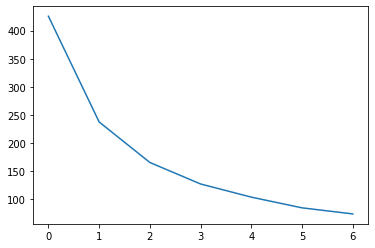

In [91]:
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

In [97]:
# Silhouette analysis
from sklearn import metrics
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5419727051514495
For n_clusters=3, the silhouette score is 0.5515166711749621
For n_clusters=4, the silhouette score is 0.5238510407649032
For n_clusters=5, the silhouette score is 0.5353248277498109
For n_clusters=6, the silhouette score is 0.4877612831992383
For n_clusters=7, the silhouette score is 0.46372676335482105
For n_clusters=8, the silhouette score is 0.4116691190956903


In [98]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
 kmeans.labels_

array([2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 2, 1], dtype=int32)

In [100]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12357.0,18623.01,393,32,2
1,12367.0,168.90,11,3,1
2,12371.0,5663.88,189,44,1
3,12372.0,1298.04,52,71,1
4,12377.0,4884.36,231,314,0


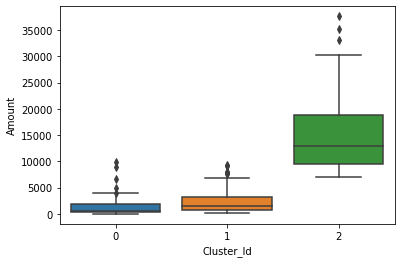

In [101]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

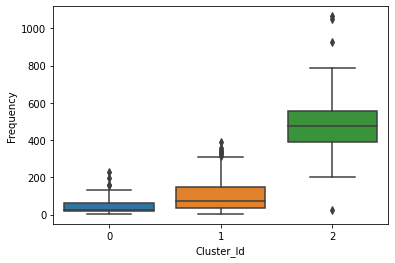

In [102]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

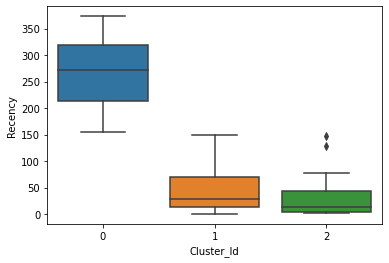

In [103]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

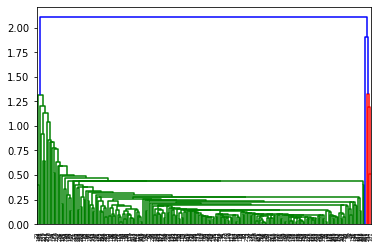

In [112]:
# Single linkage: 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.


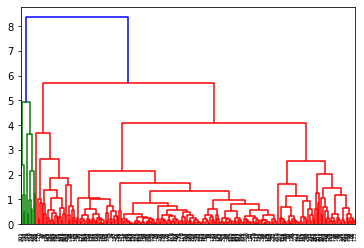

In [113]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

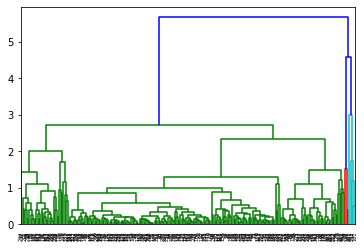

In [114]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [119]:
# 3 clusters
from scipy.cluster.hierarchy import cut_tree
cluster_labels = kmeans.labels_
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [120]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12357.0,18623.01,393,32,2,0
1,12367.0,168.90,11,3,1,0
2,12371.0,5663.88,189,44,1,0
3,12372.0,1298.04,52,71,1,0
4,12377.0,4884.36,231,314,0,0


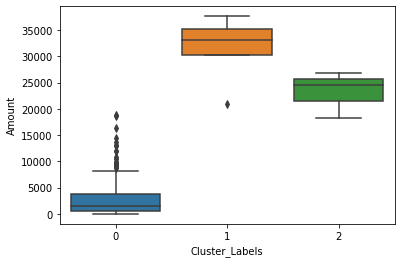

In [121]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

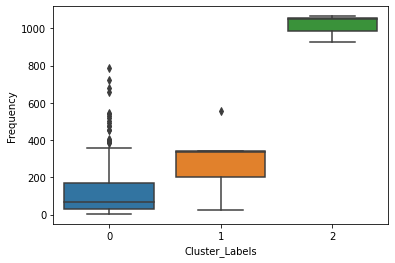

In [122]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

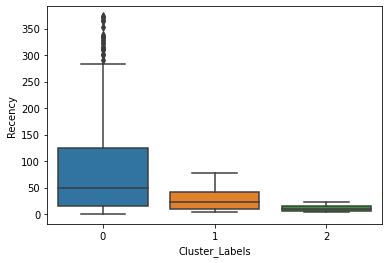

In [123]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

#Conclusion: First part
##K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster Id 1 are frequent buyers.
Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.
##Hierarchical Clustering with 3 Cluster Labels

Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster_Labels 2 are frequent buyers.
Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.